# efficientnet

Collection of EfficientNet models for image classification and feature extraction trained on Imagenet (ILSVRC-2012-CLS). [https://tfhub.dev/google/collections/efficientnet/1]


### set proxy (optional)

In [1]:
import os

proxy = 'http://proxy.vmware.com:3128'
no_proxy_list = [os.environ['KUBERNETES_SERVICE_HOST'], "10.105.150.44"]
os.environ['http_proxy'] = proxy
os.environ['HTTP_PROXY'] = proxy
os.environ['https_proxy'] = proxy
os.environ['HTTPS_PROXY'] = proxy
os.environ['NO_PROXY'] = ",".join(no_proxy_list)
os.environ['no_proxy'] = ",".join(no_proxy_list)

### dependency

In [2]:
!pip install -r requirements.txt 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 869.0 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.6/100.6 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.9/135.9 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 4.7 MB/s eta 0:00:0000:0100:01mm
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 5.5 MB/s eta 0:00:0000:0100:01mm
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 5.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.8 MB/s eta 0:00:0000:0100:01mm
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.7 MB/s

In [3]:
import tensorflow as tf
import tensorflow_hub as hub

import matplotlib.pyplot as plt
import numpy as np
import boto3

import requests
import json
import os

2023-07-01 07:19:54.459886: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-01 07:19:54.524986: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-01 07:19:54.526592: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/conda/lib/python3.8/site-packages/numpy/core/getlimits.py:52: RuntimeWarning: divide by zero encountered in log10
  self.precision = int(-log10(self.eps))
2023-07-01 07:20:04.827738: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Load Model to MinIO buckets

In [4]:
curr_path = os.getcwd()

# save model to disks
tfhub_link = "https://tfhub.dev/tensorflow/efficientnet/b0/classification/1"
model_path = os.path.join(curr_path, "my_model.pb")
model = hub.load(tfhub_link)
tf.saved_model.save(model, model_path)
print("model {} stored to path {}".format(tfhub_link, model_path))

2023-07-01 07:20:29.277853: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype int32 and shape [4]
	 [[{{node inputs}}]]
2023-07-01 07:20:29.278022: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype int32 and shape [4]
	 [[{{node inputs}}]]
2023-07-01 07:20:31.723117: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype int32 and shape [4]
	 [[{{node inputs}}]]
2023-07-01 07:20:31.723294: 

INFO:tensorflow:Assets written to: /home/jovyan/my_model.pb/assets


INFO:tensorflow:Assets written to: /home/jovyan/my_model.pb/assets


model https://tfhub.dev/tensorflow/efficientnet/b0/classification/1 stored to path /home/jovyan/my_model.pb


In [5]:
# MinIO configurations
os.environ["AWS_ENDPOINT_URL"] = "http://10.105.150.55:9000"
os.environ["AWS_REGION"] = "us-east-1"
os.environ["AWS_ACCESS_KEY_ID"] = "minioadmin"
os.environ["AWS_SECRET_ACCESS_KEY"] = "minioadmin"

s3 = boto3.resource('s3',
                    endpoint_url=os.getenv("AWS_ENDPOINT_URL"),
                    verify=True)

bucket_name='efficientnet-bucket'
try:
    s3.create_bucket(Bucket=bucket_name)
except: 
    pass

# upload
bucket = s3.Bucket(bucket_name)
version = '0001'
bucket.upload_file(os.path.join(model_path, "saved_model.pb"),
                   os.path.join(version, "saved_model.pb"))
bucket.upload_file(os.path.join(model_path, "variables", "variables.index"),
                   os.path.join(version, "variables/variables.index"))
bucket.upload_file(os.path.join(model_path, "variables", "variables.data-00000-of-00001"),
                   os.path.join(version, "variables/variables.data-00000-of-00001"))
print("Uploaded files:")
for obj in bucket.objects.filter():
    print(obj.key)

Uploaded files:
0001/saved_model.pb
0001/variables/variables.data-00000-of-00001
0001/variables/variables.index


In [6]:
%%bash

kubectl delete InferenceService efficientnet-inference --ignore-not-found=true

cat << EOF | kubectl apply -f -
apiVersion: v1
kind: Secret
metadata:
  name: minio-s3-secret-user
  annotations:
     serving.kserve.io/s3-endpoint: "10.105.150.55:9000" # replace with your s3 endpoint e.g minio-service.kubeflow:9000
     serving.kserve.io/s3-usehttps: "0" # by default 1, if testing with minio you can set to 0
     serving.kserve.io/s3-region: "us-east-2"
     serving.kserve.io/s3-useanoncredential: "false" # omitting this is the same as false, if true will ignore provided credential and use anonymous credentials
type: Opaque
stringData: # use "stringData" for raw credential string or "data" for base64 encoded string
  AWS_ACCESS_KEY_ID: minioadmin
  AWS_SECRET_ACCESS_KEY: minioadmin
---
apiVersion: v1
kind: ServiceAccount
metadata:
  name: minio-service-account-user
secrets:
- name: minio-s3-secret-user
---
apiVersion: "serving.kserve.io/v1beta1"
kind: "InferenceService"
metadata:
  name: "efficientnet-inference"
spec:
  predictor:
    serviceAccountName: minio-service-account-user
    model:
      modelFormat:
        name: tensorflow
      storageUri: "s3://efficientnet-bucket"
EOF

kubectl wait --for=condition=ready=True inferenceservice efficientnet-inference --timeout=600s
kubectl get inferenceservice efficientnet-inference -o jsonpath='{.status.url}' | cut -d "/" -f 3

secret/minio-s3-secret-user configured
serviceaccount/minio-service-account-user configured
inferenceservice.serving.kserve.io/efficientnet-inference created
inferenceservice.serving.kserve.io/efficientnet-inference condition met
efficientnet-inference.user.example.com


In [7]:
headers = {
    'Host': 'efficientnet-inference.user.example.com', 
    'Content-Type': "application/json", 
    'Cookie': "authservice_session=MTY4ODE4OTQwNnxOd3dBTkVwRlVGSkxSVUZIV2xkSFRGVlFSMWxGTmpjeVFrOVZUa1JOVGtzMk5GTlZTVVJOUmxWUldrNVRTMDlVU3pjeVNFcE5XRUU9fF54zMRDqTTVz6aooGSDlg60_jNHO6n_IZ6HZa5en5hI"
}

base_uri = 'http://10.105.150.44' + '/v1/models' + '/efficientnet-inference'
# status
response = requests.request("GET", base_uri, headers=headers)
print(response.text)
# metadata
response = requests.request("GET", base_uri + '/metadata', headers=headers)
print(response.text)

{
 "model_version_status": [
  {
   "version": "1",
   "state": "AVAILABLE",
   "status": {
    "error_code": "OK",
    "error_message": ""
   }
  }
 ]
}

{
"model_spec":{
 "name": "efficientnet-inference",
 "signature_name": "",
 "version": "1"
}
,
"metadata": {"signature_def": {
 "signature_def": {
  "serving_default": {
   "inputs": {
    "image_input": {
     "dtype": "DT_FLOAT",
     "tensor_shape": {
      "dim": [
       {
        "size": "-1",
        "name": ""
       },
       {
        "size": "-1",
        "name": ""
       },
       {
        "size": "-1",
        "name": ""
       },
       {
        "size": "3",
        "name": ""
       }
      ],
      "unknown_rank": false
     },
     "name": "serving_default_image_input:0"
    }
   },
   "outputs": {
    "probs": {
     "dtype": "DT_FLOAT",
     "tensor_shape": {
      "dim": [
       {
        "size": "-1",
        "name": ""
       },
       {
        "size": "1000",
        "name": ""
       }
      ],
      "unk

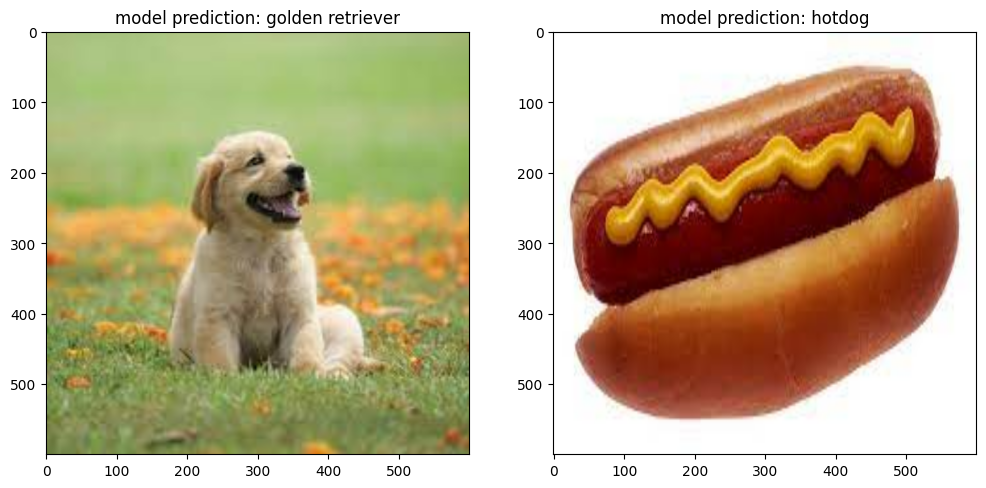

In [8]:
# https://www.tensorflow.org/tfx/serving/api_rest#predict_api

def load_image(image_path):
    tf_tensor = tf.image.convert_image_dtype(tf.image.decode_jpeg(tf.io.read_file(image_path)), tf.float32)
    tf_tensor_resize = tf.image.resize(tf_tensor, [600,600])
    return tf_tensor_resize.numpy().tolist()

# predict
instances = [load_image(image_path) for image_path in ['dog.jpeg', 'hotdog.jpeg']]

data = json.dumps({
    "signature_name": 'serving_default',
    "inputs": {
        "image_input": instances
    }
})

response = requests.request("POST", base_uri + ':predict', headers=headers, data=data)
raw_predictions = json.loads(response.text)

response = requests.get("https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt", allow_redirects=True)
maps = response.text.split("\n")[1:1001]

predictions = [maps[argmax] for argmax in np.argmax(raw_predictions['outputs'], axis=1)]

_, axs = plt.subplots(1, len(instances), figsize=(12, 12))
axs = axs.flatten()
for i in range(len(instances)):
    axs[i].imshow(instances[i])
    axs[i].set_title("model prediction: {}".format(predictions[i]))
plt.show()